<a href="https://colab.research.google.com/github/Alex-Bernal27/Colab/blob/main/IAP_Primer_Parcial_problema_4_y_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

UANL  - FCFM

Primer parcial Introducción al aprendizaje profundo

6 de marzo de 2021

Profesor: MCE. Angel Adrián Domínguez Lozano

Alumno: Alejandro Bernal Najera

# Preambulo problemas 4 y 5

**Recordatorio: Usar GPU para entrenar redes neuronales reduce el tiempo de ejecucion considerablemente**


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets
import numpy as np

In [ ]:
# El conjunto de datos
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
print("x_train dimensions : ",x_train.shape)
print("x_test dimensions : ",x_test.shape)
print("y_train dimensions : ",y_train.shape)
print("y_test dimensions : ",y_test.shape)

x_train dimensions :  (60000, 28, 28)
x_test dimensions :  (10000, 28, 28)
y_train dimensions :  (60000,)
y_test dimensions :  (10000,)


In [ ]:
# Modificacion para que las imagenes tengan la estructura correcta
x_train = x_train.reshape((60000,28,28,1))
x_test = x_test.reshape((10000,28,28,1))

In [ ]:
print("x_train dimensions : ",x_train.shape)
print("x_test dimensions : ",x_test.shape)
print("y_train dimensions : ",y_train.shape)
print("y_test dimensions : ",y_test.shape)

x_train dimensions :  (60000, 28, 28, 1)
x_test dimensions :  (10000, 28, 28, 1)
y_train dimensions :  (60000,)
y_test dimensions :  (10000,)


1


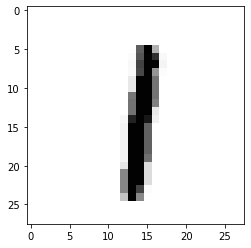

In [ ]:
# imshow muestra matrices 2D o tensor 3D con la tercera dimension con 3 entradas
# en forma de imagen
plt.imshow(x_train[40].reshape((28,28)),cmap='Greys')
print(y_train[40])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train,
 y_train, test_size = 0.05,
random_state = 0)

In [ ]:
def normalize(data):
 data = data.astype("float32")
 data = data/255.0
 return data

In [ ]:
x_train = normalize(x_train)
x_val = normalize(x_val)
x_test = normalize(x_test)

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
classes = range(10)
def results(model,epoch=20):
  r = model.fit(x_train, y_train, batch_size = 32,
                epochs = epoch, 
                validation_data = (x_val, y_val), 
                verbose = 1)
  acc = model.evaluate(x_test, y_test)
  print("test set loss : ", acc[0])
  print("test set accuracy :", acc[1]*100)
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, r.history['accuracy'])
  plt.plot(epoch_range, r.history['val_accuracy'])
  plt.title('Classification Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='lower right')
  plt.show()
  # Plot training & validation loss values
  plt.plot(epoch_range,r.history['loss'])
  plt.plot(epoch_range, r.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='lower right')
  plt.show()

def predict_class(filename, model):
  img = load_img(filename,target_size=( 28 , 28, 3)) # Lectura como imagen a color
  plt.imshow(img,cmap='Greys')
  img = img_to_array(img) 
  img = np.mean(img, axis=2)  # Promedio de los 3 canales en un solo canal
  img = img.reshape(1,28,28,1)
  img = img.astype('float32')
  img = img/255.0
  result = model.predict(img)
  dict2 = {}
  for i in range(10):
    dict2[result[0][i]] = classes[i]
  res = result[0]
  res.sort()
  res = res[::-1]
  results = res[:3]
  print("Top predictions of these images are")
  for i in range(3):
    print("{} : {}".format(dict2[results[i]],
                           (results[i]*100).round(2)))
  print('The image given as input is')

# 4. (30 puntos) Ajusta una red neuronal profunda con capas densas (sin capas de convolucion) para predicción.



Nota 1: Debes especificar la estructura de la red que estas usando, su cantidad de parametros y comentar sobre en que epoca se comienza a notar un sobreajuste.

Nota 2: Debes verificar el rendimiento de tu modelo sobre al menos una imagen creada por ti.

Nota 3: Puedes entregar más de un modelo.

Nota 4: Quien tenga el mayor accuracy recibirá 20 puntos extras.

### - Estructura de la red: 
Para iniciar el modelo hay un flatten para que las matrices que vienen convertirlos en un vector de una dimension, despues estan 4 capas densas, 3 ocultas y la de salida y tambien las tres del dropout. 
Utiliza la funcion de activacion relu en las tres capas ocultas ya que la relu anula los datos negativos para dejar los positivos algo que creo con imagenes se utiliza.
Utilizo un dropout de 0.3 pra quitarle mas o menos a cada una de las capas porque vi un sobre ajuste si no lo usaba.
Y al final utilizo la funcion de activacion softmax porque es la mejor para manejar las probabilidades ya que da valores de 0,1.
Cambie el el optimizador a "adam" porque lei que es mejor porque utiliza menor memoria y es mas rapido. Por ultimo mi funcion de perdida es categorical_crossentropy por que esta se usa cuando hay dos o más clases de etiquetas que en este caso serian 10 que son los numeros. Y cambie el numero de epocas para poder visualizar bien si si habia sobreajuste porque con 20 se malinterpretaba.

### - Cantidad de parametros: 240,936

((784+1) * 254) + ((254+1) * 128) + ((128+1) * 64) + ((64+1) * 10) = 240,936

### - Epoca que se nota el sobreajuste: 
Por la grafica de classification accuracy muestra que alrededor de la **epoca 16** hay un sobre ajuste en este modelo.

Epoch 1/30
1782/1782 [==============================] - 5s 3ms/step - loss: 0.6635 - accuracy: 0.7900 - val_loss: 0.1405 - val_accuracy: 0.9570
Epoch 2/30
1782/1782 [==============================] - 5s 3ms/step - loss: 0.1900 - accuracy: 0.9462 - val_loss: 0.1193 - val_accuracy: 0.9643
Epoch 3/30
1782/1782 [==============================] - 5s 3ms/step - loss: 0.1447 - accuracy: 0.9585 - val_loss: 0.0818 - val_accuracy: 0.9770
Epoch 4/30
1782/1782 [==============================] - 5s 3ms/step - loss: 0.1222 - accuracy: 0.9641 - val_loss: 0.0982 - val_accuracy: 0.9737
Epoch 5/30
1782/1782 [==============================] - 5s 3ms/step - loss: 0.1089 - accuracy: 0.9685 - val_loss: 0.0770 - val_accuracy: 0.9760
Epoch 6/30
1782/1782 [==============================] - 5s 3ms/step - loss: 0.0966 - accuracy: 0.9722 - val_loss: 0.0724 - val_accuracy: 0.9777
Epoch 7/30
1782/1782 [==============================] - 5s 3ms/step - loss: 0.0898 - accuracy: 0.9739 - val_loss: 0.0772 - val_accuracy:

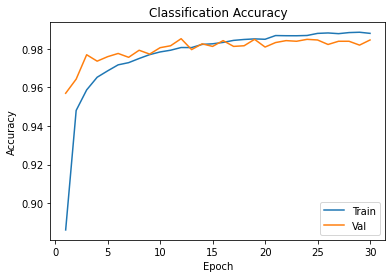

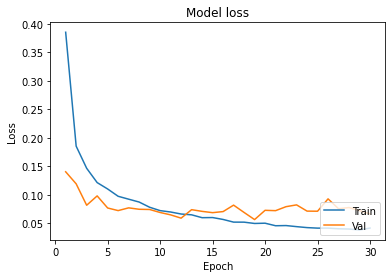

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D,Flatten, BatchNormalization
model_1 = Sequential([
 Flatten(), # Esto colapsa las imagenes en un vector de una dimension
  ## TU ARQUITECTURA
    Dense(254, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax'),
])
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9) ## PUEDES MODIFICAR EL OPTIMIZADOR
model_1.compile(optimizer="adam", loss = "categorical_crossentropy" ,##### Coloca la funcion de perdida adecuada
 metrics = ['accuracy'])
results(model_1,epoch=30)

Top predictions of these images are
4 : 100.0
9 : 0.0
7 : 0.0
The image given as input is


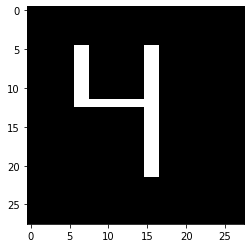

In [ ]:
predict_class("4.png", model_1)

# 5. (30 puntos) Ajusta una red neuronal convolucional (con al menos una capa convolucional) para predicción.



Nota 1: Debes especificar la estructura de la red que estas usando, su cantidad de parametros y comentar sobre en que epoca se comienza a notar un sobreajuste.

Nota 2: Debes verificar el rendimiento de tu modelo sobre al menos una imagen creada por ti.

Nota 3: Puedes entregar más de un modelo.

Nota 4: Quien tenga el mayor accuracy recibirá 20 puntos extras.

### - Estructura de la red: 
En este modelo 4 capas aunque creo que algunos toman en cuenta el maxpooling como otra capa en ese caso serian 6. Pero tenemos dos capas ocultas convolucionales, una capa densa y la capa de salida.
En las convolucionales  tenemos primero un 64 que es numero de filtros de esa capa y en la segunda tengo 32 filtros. Despues el tamaño del kernel es una matrix 3x3, con la funcion de activacion relu la cual ya mencione en el ejercicio anterior que la utilizo ya que la relu anula los datos negativos para dejar los positivos algo que creo que usa los modelos donde se trabaja con imagenes, despues con el parametro de kernel_regularizer panalizamos algunos parametros de la capa para obtener un mejor modelo.
despues de cada capa utilizamos el batchnormalization para poder normalizar todos los datos de entrada en la capa, tiene el efecto de acelerar el proceso de entrenamiento y mejorar el rendimiento y ya sea capa densa o capa convolucional lei que es importante si piensas utilizarlo debes usarlo en todas las capas, tambien utilizamos el maxpooling que este solo agarra el maximo de una matriz de 2x2. Por ultimo un flatten para convertirlo en un vector y empezar con las capas densas de 128 y 10 neuronas, con la funcion relu igual que las anteriores y la capa final con la funcion softmax para las probalididades.
Para finalizar el optimizador lo deje igual porque me daba una grafica mejor para leerla a comparacion con el adam y con la misma funcion de perdida que es por las categorias de numeros que tiene este proyecto.

### - Cantidad de parametros: 123,434


### - Epoca que se nota el sobreajuste: 
Aproximadamente tomando en cuenta la grafica de classification accuracy por la **epoca 3** se nota el sobreajuste.


Epoch 1/20
1782/1782 [==============================] - 8s 4ms/step - loss: 0.3832 - accuracy: 0.8915 - val_loss: 0.0744 - val_accuracy: 0.9810
Epoch 2/20
1782/1782 [==============================] - 7s 4ms/step - loss: 0.0784 - accuracy: 0.9799 - val_loss: 0.0569 - val_accuracy: 0.9847
Epoch 3/20
1782/1782 [==============================] - 7s 4ms/step - loss: 0.0601 - accuracy: 0.9847 - val_loss: 0.0518 - val_accuracy: 0.9857
Epoch 4/20
1782/1782 [==============================] - 7s 4ms/step - loss: 0.0516 - accuracy: 0.9868 - val_loss: 0.0429 - val_accuracy: 0.9863
Epoch 5/20
1782/1782 [==============================] - 7s 4ms/step - loss: 0.0408 - accuracy: 0.9903 - val_loss: 0.0471 - val_accuracy: 0.9867
Epoch 6/20
1782/1782 [==============================] - 7s 4ms/step - loss: 0.0354 - accuracy: 0.9915 - val_loss: 0.0388 - val_accuracy: 0.9877
Epoch 7/20
1782/1782 [==============================] - 7s 4ms/step - loss: 0.0322 - accuracy: 0.9923 - val_loss: 0.0376 - val_accuracy:

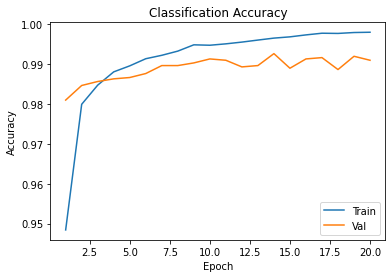

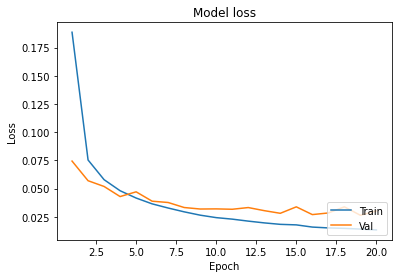

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D,Flatten, BatchNormalization
weight_decay = 1e-4
model_2 = Sequential([
        Conv2D(64, kernel_size=(3, 3), activation="relu",
        kernel_regularizer = tf.keras.regularizers.l2(weight_decay)),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(32, kernel_size=(3, 3), activation="relu",
        kernel_regularizer = tf.keras.regularizers.l2(weight_decay)),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation = 'relu'),
        BatchNormalization(),
        Dense(10, activation = 'softmax')
])
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9) ## PUEDES MODIFICAR EL OPTIMIZADOR
model_2.compile(optimizer=opt, loss = "categorical_crossentropy" ,##### Coloca la funcion de perdida adecuada,
 metrics = ['accuracy'])
results(model_2)

Top predictions of these images are
4 : 63.08
1 : 34.36
7 : 2.16
The image given as input is


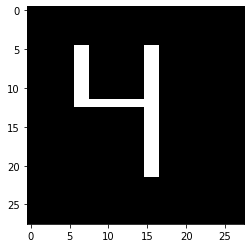

In [ ]:
predict_class("4.png", model_2)